In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import community

import networkx as nx
import matplotlib.pyplot as plt
#from networkx.algorithms import community

# Загрузим датасет
url = "facebook_combined.txt"
G = nx.read_edgelist(url)

In [14]:
with open(url, 'r') as f:
    lines = f.readlines()

# Берем только половину данных
half_lines = lines[:len(lines)//6]

# Создаем граф из половины данных
G = nx.parse_edgelist(half_lines, nodetype=int)
print(G)

Graph with 2060 nodes and 14705 edges


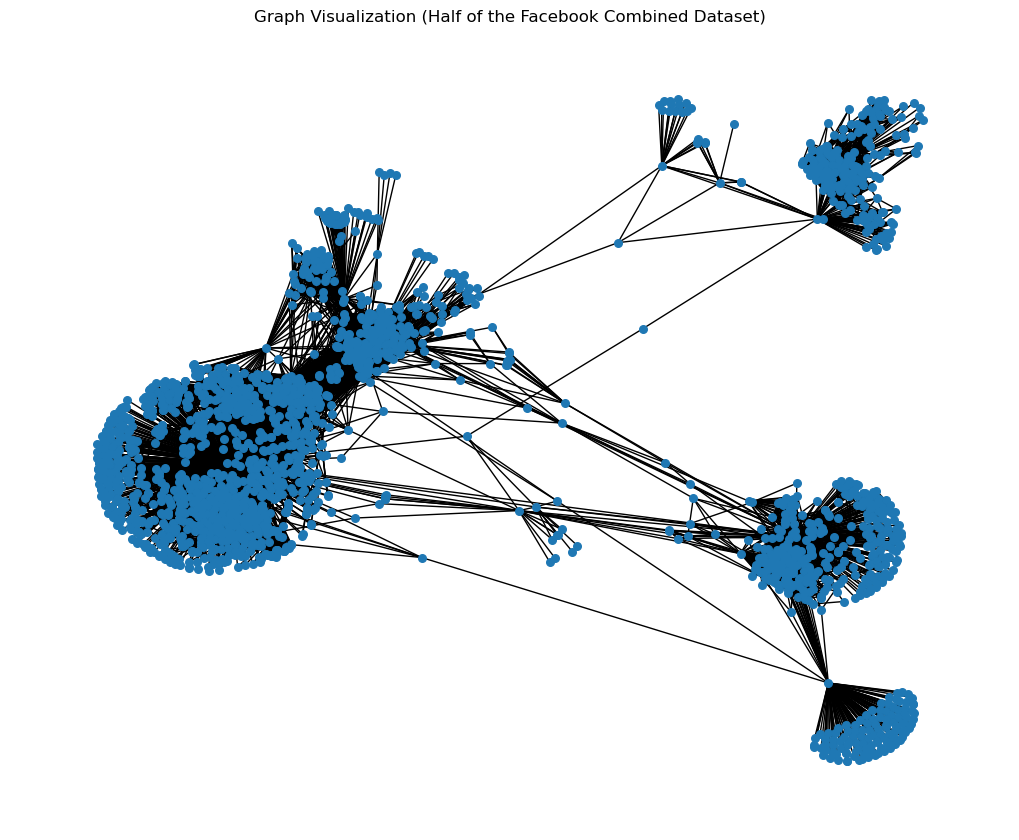

In [19]:


# Визуализация графа
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=False, node_size=30)
plt.title("Graph Visualization (Half of the Facebook Combined Dataset)")
plt.show()

#алгоритма Лувена

In [20]:
# Метод Лувена
partition_louvain = community.best_partition(G)
print("Louvain Method - Communities:", len(set(partition_louvain.values())))


Louvain Method - Communities: 14


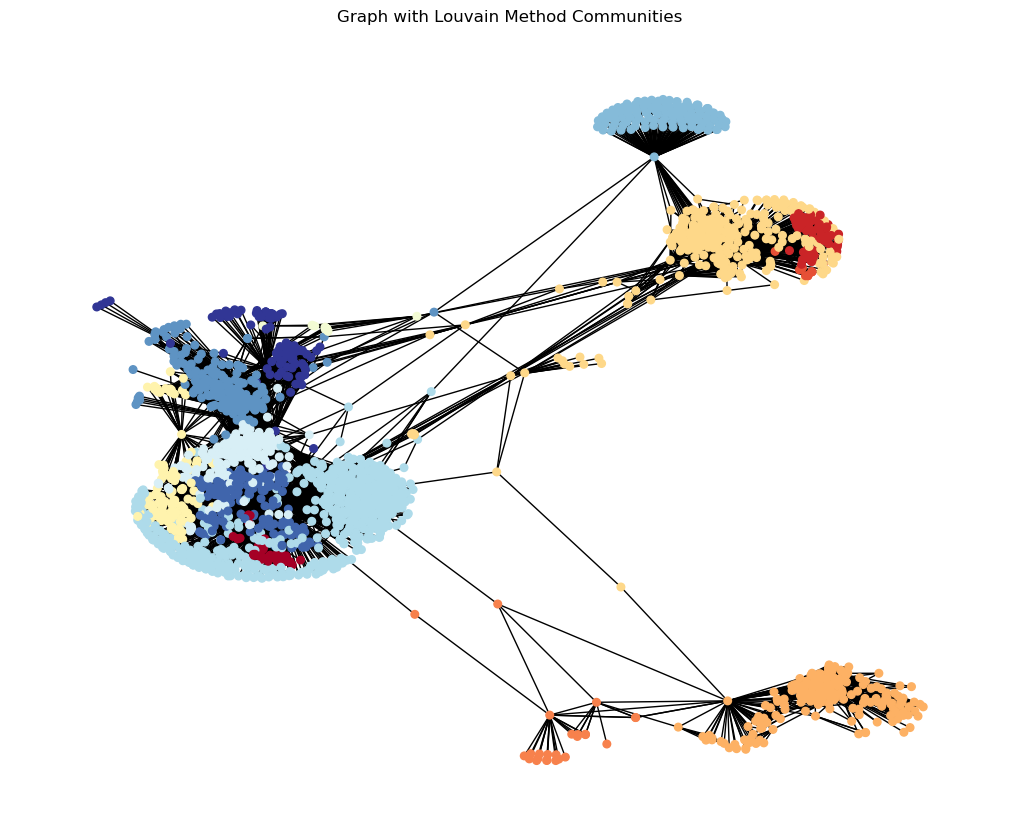

In [21]:
pos = nx.spring_layout(G)
colors = [partition_louvain[node] for node in G.nodes()]

plt.figure(figsize=(10, 8))
nx.draw(G, pos, node_color=colors, cmap=plt.cm.RdYlBu, with_labels=False, node_size=30)
plt.title("Graph with Louvain Method Communities")
plt.show()

#Label Propagation

In [22]:
from networkx.algorithms.community import label_propagation_communities

partition_label_propagation = list(label_propagation_communities(G))
print("Label Propagation - Communities:", len(partition_label_propagation))

Label Propagation - Communities: 33


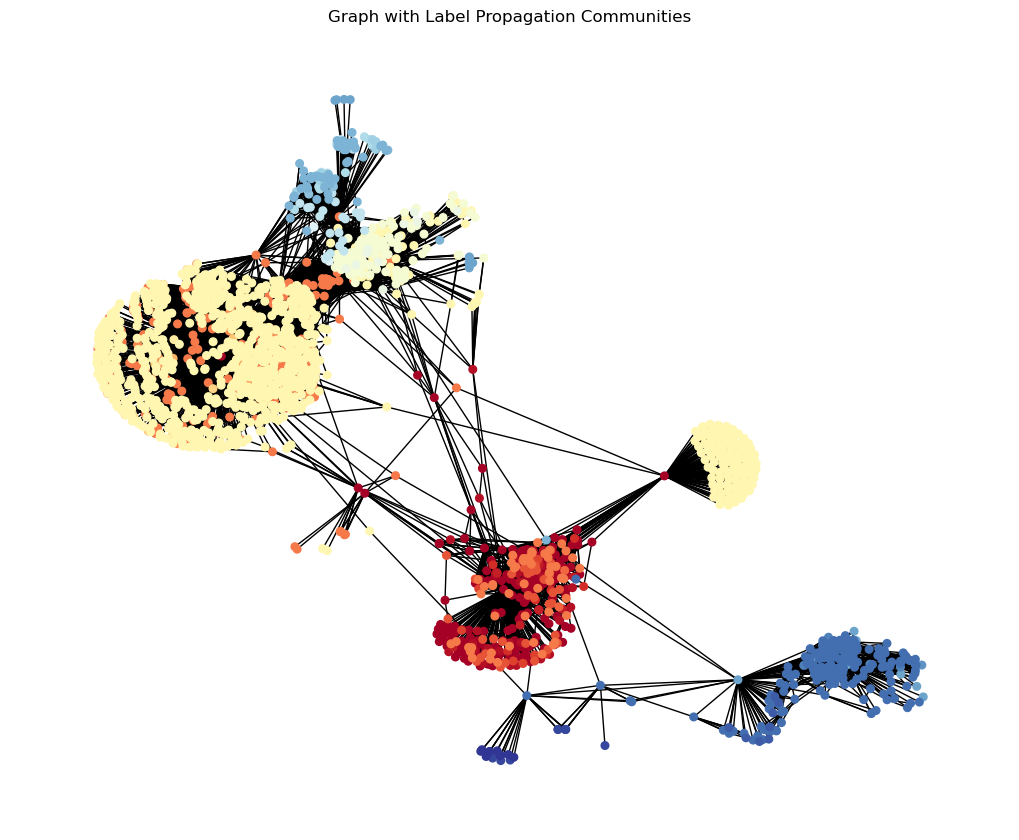

In [23]:
pos = nx.spring_layout(G)
colors = [i for i, comm in enumerate(partition_label_propagation) for _ in comm]
plt.figure(figsize=(10, 8))
nx.draw(G, pos, node_color=colors, cmap=plt.cm.RdYlBu, with_labels=False, node_size=30)
plt.title("Graph with Label Propagation Communities")
plt.show()

#Girvan-Newman

In [15]:
communities_generator = nx.community.girvan_newman(G)
communities = tuple(sorted(c) for c in next(communities_generator))
print("Girvan-Newman Method - Communities:", len(communities))

Girvan-Newman Method - Communities: 2


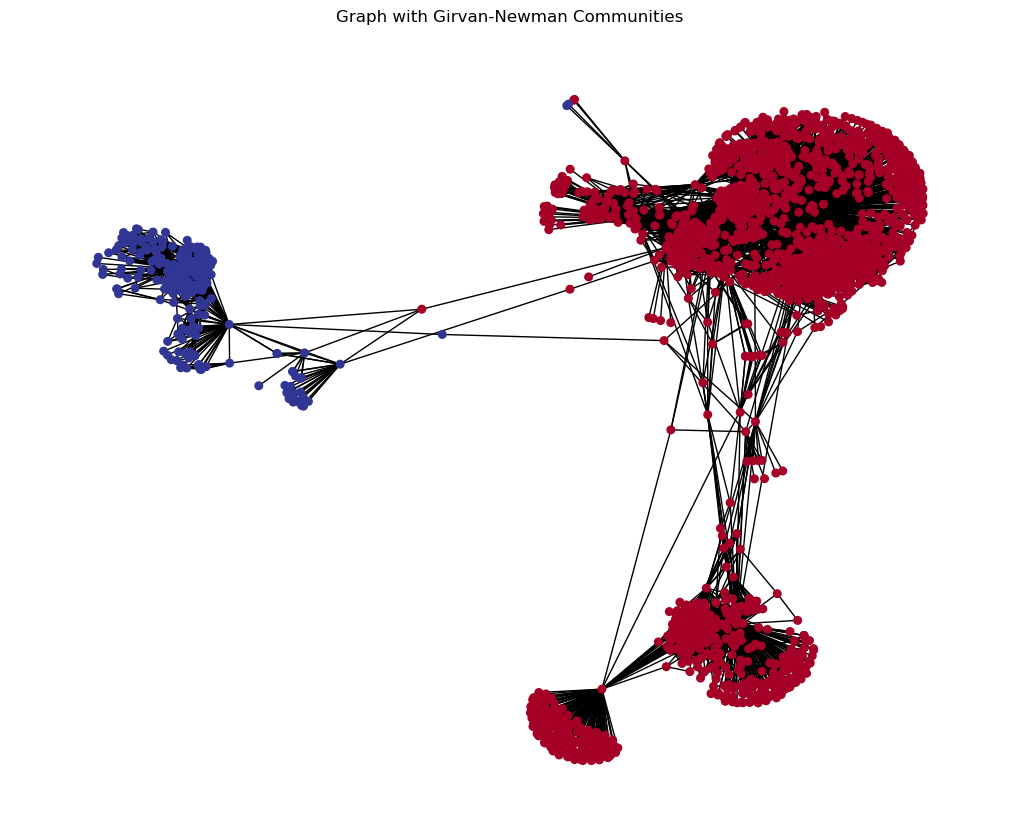

In [16]:
pos = nx.spring_layout(G)
colors = [i for i, comm in enumerate(communities) for _ in comm]
plt.figure(figsize=(10, 8))
nx.draw(G, pos, node_color=colors, cmap=plt.cm.RdYlBu, with_labels=False, node_size=30)
plt.title("Graph with Girvan-Newman Communities")
plt.show()